In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from qbm import QBM

In [9]:
# matplotlib styling
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = '12'

In [3]:
N = 40
s1 = QBM(N)

100%|██████████| 1600/1600 [00:07<00:00, 221.76it/s]


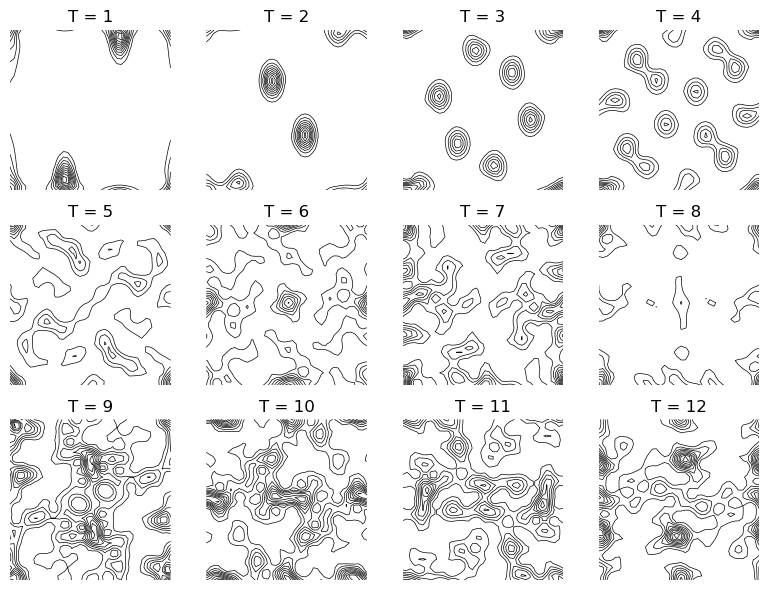

In [4]:
nr, nc = 3, 4
fig, axes = plt.subplots(nr, nc, figsize=(nc*2, nr*2), tight_layout = True)
X = np.linspace(0, N-1, N)
Y = np.linspace(0, N-1, N)
# axes[0, 0].matshow(s1_3, cmap="Greys", interpolation="bicubic")
T = 1
for i in range(nr):
    for j in range(nc):
        s1_ = s1.autocorr(T)
        axes[i, j].set_title(f"T = {T}")
        # axes[i, j].matshow(s1_, cmap="Greys", interpolation="bicubic")
        axes[i, j].contour(X, Y, s1_, 10, linewidths = 0.5, colors="black")
        axes[i, j].axis('square')
        T += 1
for ax in axes.ravel():
    ax.set_axis_off()
fig.tight_layout()
plt.show()

# Coherent States

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from qbm import QBM

# matplotlib styling
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = '12'

N = 16
s = QBM(N)

In [2]:
def harper_states_pq(s: QBM):
    N = s.N
    s.gen_harper_states()
    h_st = s.harper_states["evecs"]
    h_pqs = []
    for _ in range(N):
        atemp = np.zeros((N, N))
        for p in range(N):
            for q in range(N):
                atemp[q, p] = s.W_pq(q+1, p+1, h_st[_])
        h_pqs.append(atemp)
    return h_pqs, s.harper_states['evals']

In [3]:
def baker_states_pq(s: QBM):
    N = s.N
    s.gen_baker_states()
    b_st = s.baker_states["evecs"]
    b_pqs = []
    for _ in range(N):
        atemp = np.zeros((N, N))
        for p in range(N):
            for q in range(N):
                atemp[q, p] = s.W_pq(q+1, p+1, b_st[_])
        b_pqs.append(atemp)
    return b_pqs, s.baker_states['evals']

In [4]:
def plot_harper_states(
    hpqs, hvals, nc :int = 4,
    interp='spline16', cmap='hot'
    ):
    N = len(hvals)
    if N % nc:
        nr = (N // nc) + 1
    else:
        nr = N // nc
    fig, axes = plt.subplots(nr, nc, figsize=(nc*2, nr*2))
    ind = 1
    for i in range(nr):
        for j in range(nc):
            if ind > N:
                axes[i, j].axis('off')
                break
            axes[i, j].set_title(f"n = {ind} ({np.round(np.abs(hvals[ind-1]), 4)})", pad = 0.5, y = 2)
            axes[i, j].matshow(hpqs[ind-1], interpolation=interp, cmap=cmap)
            ind += 1
    for ax in axes.ravel():
        # ax.set_axis_off()
        ax.set_xticks([])
        ax.set_yticks([])
    plt.suptitle(f'Harper eigenstates in coherent-state representation (N = {N})')
    plt.tight_layout()
    plt.show()

In [5]:
def plot_baker_states(
    bpqs, bvals, nc :int = 4,
    interp='spline16', cmap='hot'
    ):
    N = len(bvals)
    if N % nc:
        nr = (N // nc) + 1
    else:
        nr = N // nc
    fig, axes = plt.subplots(nr, nc, figsize=(nc*2, nr*2))
    ind = 1
    for i in range(nr):
        for j in range(nc):
            if ind > N:
                axes[i, j].axis('off')
                break
            axes[i, j].set_title(f"n = {ind} ({np.round(bvals[ind-1].real, 4)})", pad = 0.5, y = 2)
            axes[i, j].matshow(bpqs[ind-1], interpolation=interp, cmap=cmap)
            ind += 1
    for ax in axes.ravel():
        # ax.set_axis_off()
        ax.set_xticks([])
        ax.set_yticks([])
    plt.suptitle(f'Baker eigenstates in coherent-state representation (N = {N})')
    plt.tight_layout()
    plt.show()

In [6]:
hs = harper_states_pq(s)

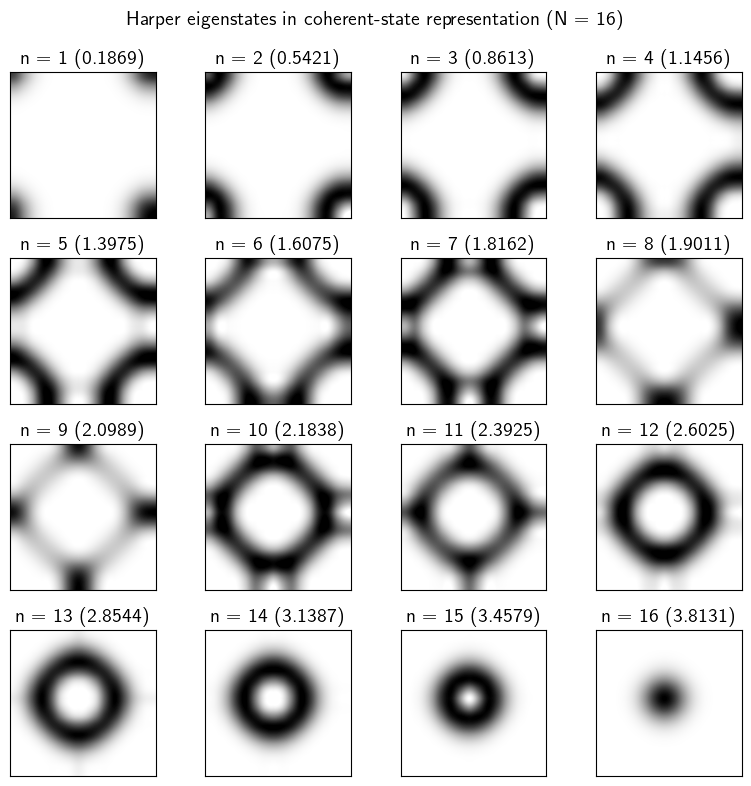

In [7]:
plot_harper_states(*hs, cmap='binary')

In [8]:
h0 = s.harper_states['evecs'][0]
h0s = s.T_pq(8, 8) @ h0

In [9]:
N = s.N
h0s_pq = np.zeros((N, N))
for p in range(N):
    for q in range(N):
        h0s_pq[q, p] = s.W_pq(q+1, p+1, h0s)

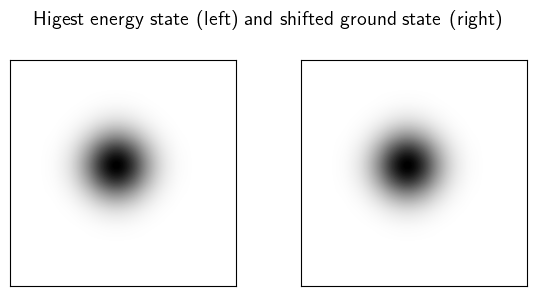

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
cmap = "binary"
interp = "spline16"
X = np.linspace(0, s.N-1, s.N)
Y = np.linspace(0, s.N-1, s.N)

axes[0].matshow(hs[0][-1].T, cmap=cmap, interpolation=interp)
# axes[0].contour(X, Y, hs[0][-1], cmap='binary')
axes[1].matshow(h0s_pq.T, cmap=cmap, interpolation=interp)
# axes[1].contour(X, Y, h0s_pq, cmap='binary')
for ax in axes.ravel():
    # ax.set_axis_off()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set(aspect=1)
plt.suptitle(f'Higest energy state (left) and shifted ground state (right)')
plt.tight_layout()
plt.show()

In [11]:
testeq = lambda  _ : np.isclose(
    (s.H["H"] @ s.harper_states['evecs'][_]) / s.harper_states['evals'][_],
    s.harper_states['evecs'][_], atol = 0.0
).T.all()

In [12]:
outeq = [testeq(_) for _ in range(s.N)]
np.all(outeq)

True

In [13]:
((s.H['H'] @ h0s)/s.harper_states['evals'][-1]).T

matrix([[ 1.95066557e-05-9.80665805e-05j,
         -1.28507245e-04+6.46049549e-04j,
          6.60198396e-04-3.31904147e-03j,
         -2.99914073e-03+1.50776986e-02j,
          1.13857804e-02-5.72401833e-02j,
         -3.38465583e-02+1.70158139e-01j,
          7.37435789e-02-3.70734006e-01j,
         -1.10938399e-01+5.57724994e-01j,
          1.10938399e-01-5.57724994e-01j,
         -7.37435789e-02+3.70734006e-01j,
          3.38465583e-02-1.70158139e-01j,
         -1.13857804e-02+5.72401833e-02j,
          2.99914073e-03-1.50776986e-02j,
         -6.60198396e-04+3.31904147e-03j,
          1.28507245e-04-6.46049549e-04j,
         -1.95066557e-05+9.80665805e-05j]])

In [14]:
(s.harper_states['evecs'][-1]).T

matrix([[-9.99878184e-05+5.42210776e-17j,
          6.58706408e-04-1.60411516e-17j,
         -3.38406534e-03-2.41407249e-17j,
          1.53730882e-02+5.57826205e-17j,
         -5.83615848e-02-7.40411190e-17j,
          1.73491734e-01+7.53086210e-17j,
         -3.77997115e-01-5.26516326e-17j,
          5.68651472e-01+0.00000000e+00j,
         -5.68651472e-01+6.08294560e-17j,
          3.77997115e-01-9.30865210e-17j,
         -1.73491734e-01+9.38672783e-17j,
          5.83615848e-02-8.02841406e-17j,
         -1.53730882e-02+5.74271016e-17j,
          3.38406534e-03-2.45027232e-17j,
         -6.58706408e-04-1.59706888e-17j,
          9.99878184e-05+5.42103818e-17j]])

In [15]:
np.isclose((s.H['H'] @ h0s)/s.harper_states['evals'][-1], s.harper_states['evecs'][-1], atol=0.0).T

matrix([[False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False]])

In [16]:
s.harper_states['evals'][-1]

(3.813148013247556+7.432046276459462e-29j)

In [17]:
np.average(((s.H['H'] @ h0s) / h0s).real)

3.813148013246245

In [18]:
np.isclose(np.average(((s.H['H'] @ h0s) / h0s).real), s.harper_states['evals'][-1])

True

In [19]:
F = s.gen_cob_mat()

In [21]:
F @ h0

matrix([[ 5.68651472e-01+5.39499001e-16j],
        [ 3.77997115e-01+5.82867088e-16j],
        [ 1.73491734e-01+1.11022302e-16j],
        [ 5.83615848e-02+8.32667268e-17j],
        [ 1.53730882e-02-2.35922393e-16j],
        [ 3.38406534e-03-5.55111512e-17j],
        [ 6.58706408e-04+3.33066907e-16j],
        [ 9.99878184e-05+1.94289029e-16j],
        [-9.99878184e-05+1.66533454e-16j],
        [-6.58706408e-04+2.22044605e-16j],
        [-3.38406534e-03-7.49400542e-16j],
        [-1.53730882e-02+2.22044605e-16j],
        [-5.83615848e-02-2.77555756e-16j],
        [-1.73491734e-01+4.16333634e-17j],
        [-3.77997115e-01-4.99600361e-16j],
        [-5.68651472e-01-7.97972799e-16j]])

In [22]:
F @ h0s

matrix([[-1.95066557e-05+9.80665805e-05j],
        [ 1.28507245e-04-6.46049549e-04j],
        [-6.60198396e-04+3.31904147e-03j],
        [ 2.99914073e-03-1.50776986e-02j],
        [-1.13857804e-02+5.72401833e-02j],
        [ 3.38465583e-02-1.70158139e-01j],
        [-7.37435789e-02+3.70734006e-01j],
        [ 1.10938399e-01-5.57724994e-01j],
        [-1.10938399e-01+5.57724994e-01j],
        [ 7.37435789e-02-3.70734006e-01j],
        [-3.38465583e-02+1.70158139e-01j],
        [ 1.13857804e-02-5.72401833e-02j],
        [-2.99914073e-03+1.50776986e-02j],
        [ 6.60198396e-04-3.31904147e-03j],
        [-1.28507245e-04+6.46049549e-04j],
        [ 1.95066557e-05-9.80665805e-05j]])

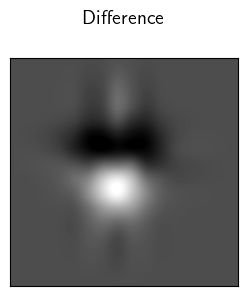

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(6, 3))
cmap = "binary"
interp = "spline16"
axes.matshow(hs[0][-1]-h0s_pq, cmap=cmap, interpolation=interp)
axes.set_xticks([])
axes.set_yticks([])
plt.suptitle(f'Difference')
plt.tight_layout()
plt.show()

In [23]:
bs = baker_states_pq(s)

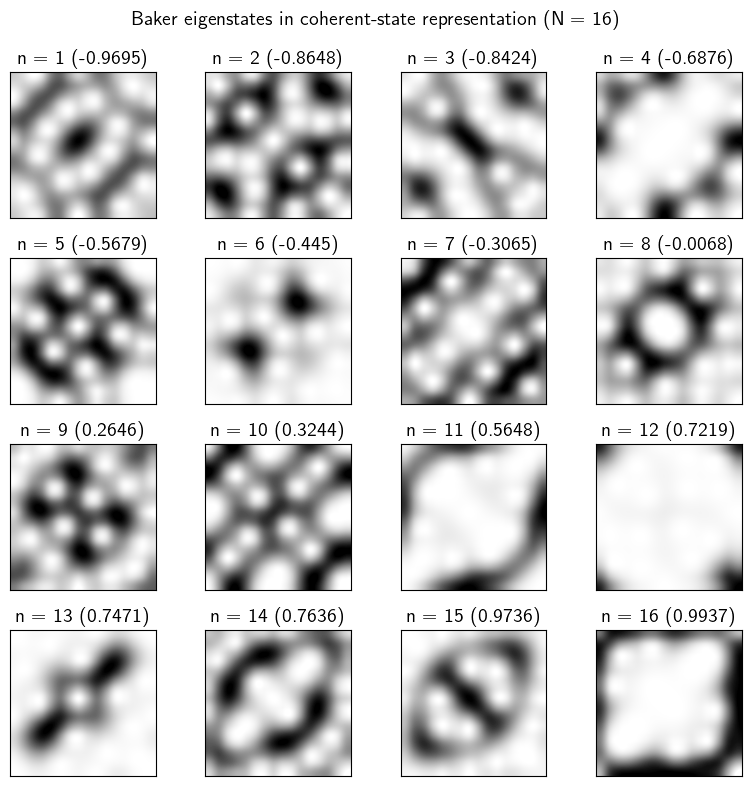

In [24]:
plot_baker_states(*bs, cmap="binary")